<a href="https://colab.research.google.com/github/bullet400/San_Francisco_Crime_Classification/blob/master/Copy_ofchicago_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [ ]:
%matplotlib inline

In [ ]:
df1 =pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2001.csv', error_bad_lines =False)
df2  =pd.read_csv('/content/drive/MyDrive/Chicago_Crimes_2012.csv', error_bad_lines =False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
chicago_crime =pd.concat([df1, df2])

In [ ]:
df4 =pd.read_csv('/content/drive/MyDrive/Chicago_Crimes.csv', error_bad_lines=False)

In [ ]:
df4.shape

(1456714, 23)

In [ ]:
chicago_crime.shape

(2928839, 23)

In [ ]:
chicago_crime.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424.0,4.0,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935.0,9.0,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"


In [ ]:
chicago_crime.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1669
Arrest                       1
Domestic                     1
Beat                         1
District                     2
Ward                    614801
Community Area          614907
FBI Code                     1
X Coordinate             60466
Y Coordinate             60466
Year                         1
Updated On                   1
Latitude                 60466
Longitude                60466
Location                 60466
dtype: int64

In [ ]:
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928839 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                object 
 10  Domestic              object 
 11  Beat                  float64
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: floa

In [ ]:
chicago_crime.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.928839e+06,2.928839e+06,2.928838e+06,2.928837e+06,2.314038e+06,2.313932e+06,2.868373e+06,2.868373e+06,2.928838e+06,2.868373e+06,2.868373e+06
mean,3.809340e+06,5.902751e+06,1.185526e+03,1.131275e+01,2.271853e+01,3.734230e+01,1.164459e+06,1.886080e+06,2.007932e+03,4.184300e+01,-8.767200e+01
std,1.066671e+06,3.742023e+06,7.009265e+02,6.941391e+00,1.386059e+01,2.144420e+01,1.736197e+04,3.285314e+04,6.051016e+00,9.041357e-02,6.277209e-02
min,3.000000e+00,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.060440e+06,2.234500e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152896e+06,1.859537e+06,2.002000e+03,4.177000e+01,-8.771396e+01
50%,3.793873e+06,3.151260e+06,1.111000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.165939e+06,1.891386e+06,2.004000e+03,4.185756e+01,-8.766632e+01
75%,4.527372e+06,9.599050e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.600000e+01,1.176335e+06,1.909520e+06,2.014000e+03,4.190744e+01,-8.762854e+01
max,6.253474e+06,1.082788e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.017000e+03,4.202291e+01,-8.752453e+01


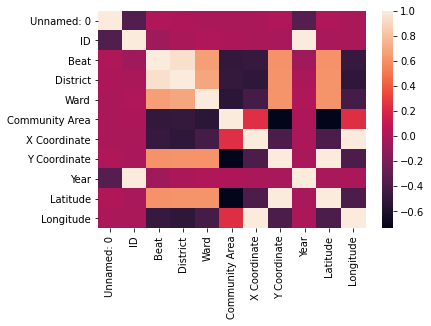

In [ ]:
sns.heatmap(chicago_crime.corr())

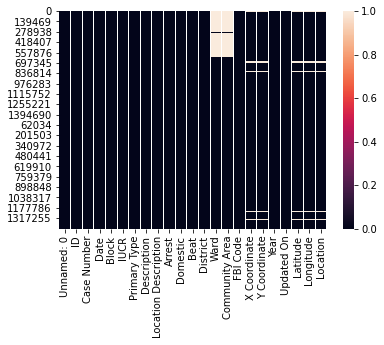

In [ ]:
sns.heatmap(chicago_crime.isnull())

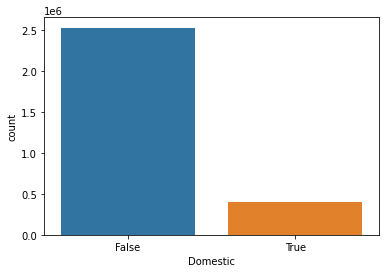

In [ ]:
sns.countplot(x='Domestic', data=chicago_crime)

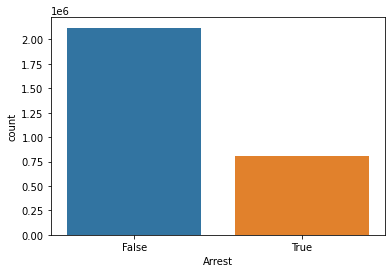

In [ ]:
sns.countplot(x='Arrest', data=chicago_crime)

In [ ]:
chicago_crime['Location Description'].nunique(dropna=True)

168

In [ ]:
df=chicago_crime.drop(['Unnamed: 0','ID','FBI Code','IUCR','X Coordinate','Y Coordinate','Updated On','Case Number','District','Latitude','Longitude','Beat',
                      'Community Area','Ward','Year','Location'],axis=1)

In [ ]:
df.tail(10)

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
1456704,05/03/2016 11:30:00 PM,053XX S PULASKI RD,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False
1456705,05/03/2016 11:50:00 PM,036XX E 106TH ST,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,False
1456706,05/03/2016 10:25:00 PM,071XX S MOZART ST,BATTERY,SIMPLE,SIDEWALK,True,False
1456707,05/03/2016 11:00:00 PM,085XX S MAY ST,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False
1456708,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True
1456713,05/03/2016 11:38:00 PM,001XX E 75TH ST,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False


## conversion of the date into a datetime format

In [ ]:
df.Date =pd.to_datetime(df.Date, format ='%m/%d/%Y %I:%M:%S %p')

In [ ]:
df.index =pd.DatetimeIndex(df.Date)

In [ ]:
df['Date'].unique()

array(['2004-01-01T00:01:00.000000000', '2003-03-01T00:00:00.000000000',
       '2004-06-20T11:00:00.000000000', ...,
       '2016-05-03T23:28:00.000000000', '2016-05-03T23:33:00.000000000',
       '2016-05-03T21:07:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [ ]:
df.tail()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
2016-05-03 21:07:00,2016-05-03 21:07:00,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True
2016-05-03 23:38:00,2016-05-03 23:38:00,001XX E 75TH ST,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False


In [ ]:
df['Primary Type'].value_counts()

THEFT                                630112
BATTERY                              545270
CRIMINAL DAMAGE                      325441
NARCOTICS                            291819
ASSAULT                              185443
OTHER OFFENSE                        183309
BURGLARY                             161754
MOTOR VEHICLE THEFT                  138148
DECEPTIVE PRACTICE                   117795
ROBBERY                              112772
CRIMINAL TRESPASS                     80070
WEAPONS VIOLATION                     30299
PROSTITUTION                          26279
PUBLIC PEACE VIOLATION                20926
OFFENSE INVOLVING CHILDREN            19286
CRIM SEXUAL ASSAULT                   12099
SEX OFFENSE                           11393
INTERFERENCE WITH PUBLIC OFFICER       7399
LIQUOR LAW VIOLATION                   6316
ARSON                                  5285
GAMBLING                               5193
HOMICIDE                               5029
KIDNAPPING                      

In [ ]:
df['Description'].value_counts()

SIMPLE                          388988
$500 AND UNDER                  284113
DOMESTIC BATTERY SIMPLE         194009
TO VEHICLE                      160673
OVER $500                       157269
                                 ...  
THEFT RETAIL                         1
FAILURE TO KEEP HYPO RECORDS         1
DOMESTIC VIOLENCE                    1
VIOLATION OF SUMMARY CLOSURE         1
FO                                   1
Name: Description, Length: 368, dtype: int64

## finding the top 10 crimes that was comitted

In [ ]:
df['Primary Type'].value_counts().iloc[:10]

THEFT                  630112
BATTERY                545270
CRIMINAL DAMAGE        325441
NARCOTICS              291819
ASSAULT                185443
OTHER OFFENSE          183309
BURGLARY               161754
MOTOR VEHICLE THEFT    138148
DECEPTIVE PRACTICE     117795
ROBBERY                112772
Name: Primary Type, dtype: int64

In [ ]:
order_num =df['Primary Type'].value_counts().iloc[:10].index

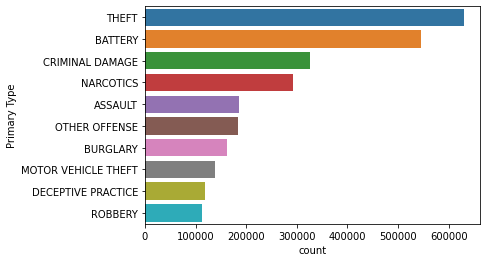

In [ ]:
sns.countplot(y='Primary Type', data=df, order=order_num)

## finding how many of the crimes are street base,(location)

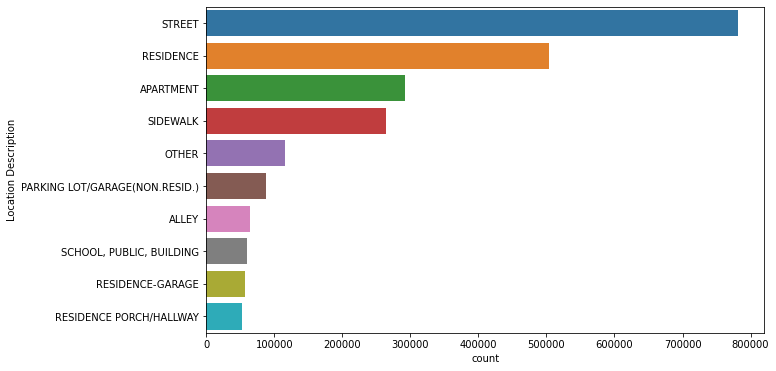

In [ ]:
order_num2 =df['Location Description'].value_counts().iloc[:10].index
plt.figure(figsize=(10,6))
sns.countplot(y='Location Description', data=df, order =order_num2)

## finding the number of specific crime that occured in a specific month

In [ ]:
df.resample('Y').size()

Date
2001-12-31    485272
2002-12-31    485938
2003-12-31    471991
2004-12-31     28924
2005-12-31         0
2006-12-31         0
2007-12-31         0
2008-12-31         0
2009-12-31         0
2010-12-31         0
2011-12-31         0
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes in a year')

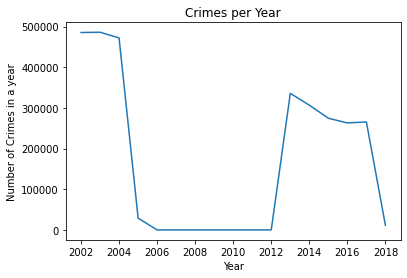

In [ ]:
plt.plot(df.resample('Y').size())
plt.title('Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes in a year')

In [ ]:
df.resample('M').size()

Date
2001-01-31    37989
2001-02-28    33763
2001-03-31    40527
2001-04-30    40046
2001-05-31    41789
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 193, dtype: int64

Text(0, 0.5, 'Number of Crimes in a month')

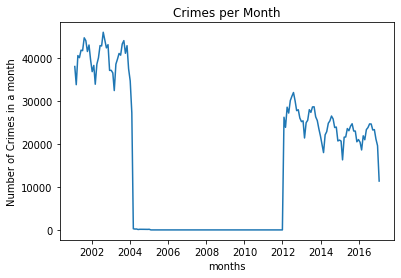

In [ ]:
plt.plot(df.resample('M').size())
plt.title('Crimes per Month')
plt.xlabel('months')
plt.ylabel('Number of Crimes in a month')

Text(0, 0.5, 'Number of Crimes in a day')

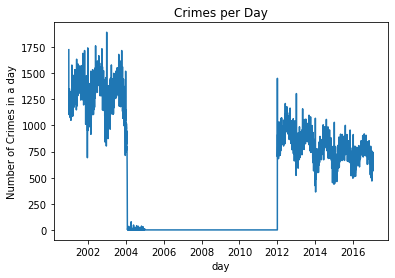

In [ ]:
plt.plot(df.resample('d').size())
plt.title('Crimes per Day')
plt.xlabel('day')
plt.ylabel('Number of Crimes in a day')

Text(0, 0.5, 'Number of Crimes in a Quater')

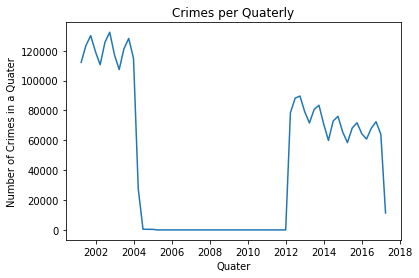

In [ ]:
plt.plot(df.resample('Q').size())
plt.title('Crimes per Quaterly')
plt.xlabel('Quater')
plt.ylabel('Number of Crimes in a Quater')

In [ ]:
df_1 =df.resample('M').size().reset_index()

In [ ]:
df_1

,Date,0
0,2001-01-31,37989
1,2001-02-28,33763
2,2001-03-31,40527
3,2001-04-30,40046
4,2001-05-31,41789
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [ ]:
df_1.columns =['Date','Total Crimes']

In [ ]:
df_1

,Date,Total Crimes
0,2001-01-31,37989
1,2001-02-28,33763
2,2001-03-31,40527
3,2001-04-30,40046
4,2001-05-31,41789
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [ ]:
df_2 =df_1.rename(columns ={'Date':'ds','Total Crimes':'y' })

In [ ]:
df_2['ds']

0     2001-01-31
1     2001-02-28
2     2001-03-31
3     2001-04-30
4     2001-05-31
         ...    
188   2016-09-30
189   2016-10-31
190   2016-11-30
191   2016-12-31
192   2017-01-31
Name: ds, Length: 193, dtype: datetime64[ns]

In [ ]:
df_2['y']

0      37989
1      33763
2      40527
3      40046
4      41789
       ...  
188    23235
189    23314
190    21140
191    19580
192    11357
Name: y, Length: 193, dtype: int64

In [ ]:
df_2.head()

,ds,y
0,2001-01-31,37989
1,2001-02-28,33763
2,2001-03-31,40527
3,2001-04-30,40046
4,2001-05-31,41789


In [ ]:
 m = Prophet()

In [ ]:
m.fit(df_2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future =m.make_future_dataframe(periods =1825)

In [ ]:
forcast =m.predict(future)

In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,37055.243130,23343.470881,48525.148067,37055.243130,37055.243130,-1065.764611,-1065.764611,-1065.764611,-1065.764611,-1065.764611,-1065.764611,0.0,0.0,0.0,35989.478519
1,2001-02-28,36643.080724,21083.424712,46255.036458,36643.080724,36643.080724,-3001.357092,-3001.357092,-3001.357092,-3001.357092,-3001.357092,-3001.357092,0.0,0.0,0.0,33641.723632
2,2001-03-31,36186.758060,22969.414731,48122.585091,36186.758060,36186.758060,-592.292270,-592.292270,-592.292270,-592.292270,-592.292270,-592.292270,0.0,0.0,0.0,35594.465790
3,2001-04-30,35745.155481,23420.936268,47804.382062,35745.155481,35745.155481,-529.631100,-529.631100,-529.631100,-529.631100,-529.631100,-529.631100,0.0,0.0,0.0,35215.524381
4,2001-05-31,35288.832817,23759.531784,49017.163150,35288.832817,35288.832817,647.605723,647.605723,647.605723,647.605723,647.605723,647.605723,0.0,0.0,0.0,35936.438540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2022-01-26,44474.248512,32587.916826,61219.450182,39823.468922,49179.655571,2767.648179,2767.648179,2767.648179,2767.648179,2767.648179,2767.648179,0.0,0.0,0.0,47241.896691
2014,2022-01-27,44483.528223,32566.909415,60259.238852,39829.216600,49194.830335,2167.412133,2167.412133,2167.412133,2167.412133,2167.412133,2167.412133,0.0,0.0,0.0,46650.940356
2015,2022-01-28,44492.807934,33654.219036,60379.967496,39834.964278,49210.005098,1495.134860,1495.134860,1495.134860,1495.134860,1495.134860,1495.134860,0.0,0.0,0.0,45987.942794
2016,2022-01-29,44502.087645,32392.249492,58500.863260,39840.823507,49225.179862,760.124480,760.124480,760.124480,760.124480,760.124480,760.124480,0.0,0.0,0.0,45262.212124


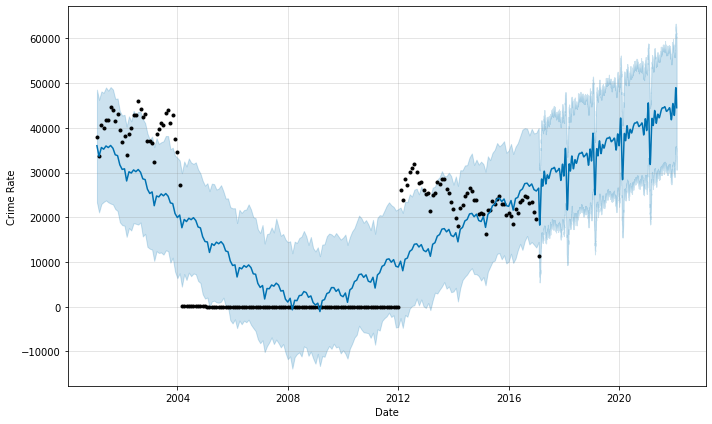

In [ ]:
figure=m.plot(forcast, xlabel='Date', ylabel='Crime Rate')

## Performing the cross validation on the model

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
my_cv =cross_validation(m, initial='295 days', period ='365 days', horizon='1825 days')

INFO:fbprophet:Making 11 forecasts with cutoffs between 2002-02-04 00:00:00 and 2012-02-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [ ]:
#my_cv2=cross_validation(m, initial = 730, period = 180, horizon = 3650, units = 'days')
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '1825 days')

INFO:fbprophet:Making 19 forecasts with cutoffs between 2003-03-21 00:00:00 and 2012-02-02 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


In [ ]:
my_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-02-28,24871.911980,24871.911951,24871.912010,33865,2002-02-04
1,2002-03-31,33149.467556,33149.467473,33149.467632,38534,2002-02-04
2,2002-04-30,36107.318132,36107.317974,36107.318274,39989,2002-02-04
3,2002-05-31,25704.858502,25704.858258,25704.858735,42853,2002-02-04
4,2002-06-30,45444.670482,45444.670143,45444.670820,42771,2002-02-04


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_p =performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_p.head()

,horizon,mse,rmse,mae,mdape,coverage
0,180 days,2.863047e+08,16920.540992,13337.178144,inf,0.460177
1,184 days,2.865127e+08,16926.686436,13346.001697,inf,0.451327
2,186 days,2.880374e+08,16971.665392,13383.639413,inf,0.451327
3,190 days,2.891543e+08,17004.538218,13438.233839,inf,0.446903
4,191 days,2.923971e+08,17099.621863,13551.542954,inf,0.442478


In [ ]:
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
#fig = plot_cross_validation_metric(my_cv, metric='mape')
prediction =forcast


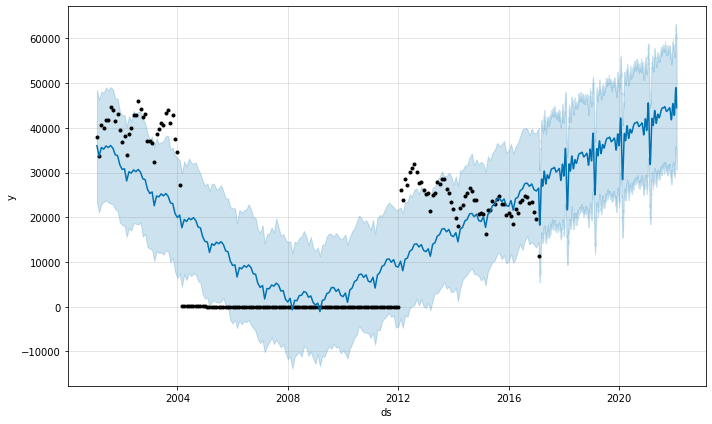

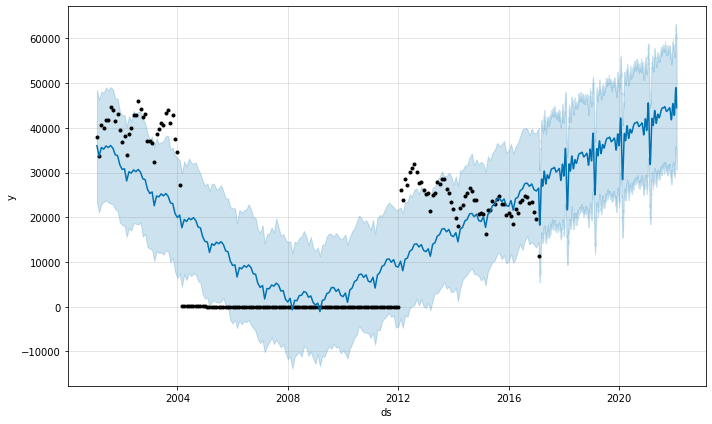

In [ ]:
m.plot(prediction)

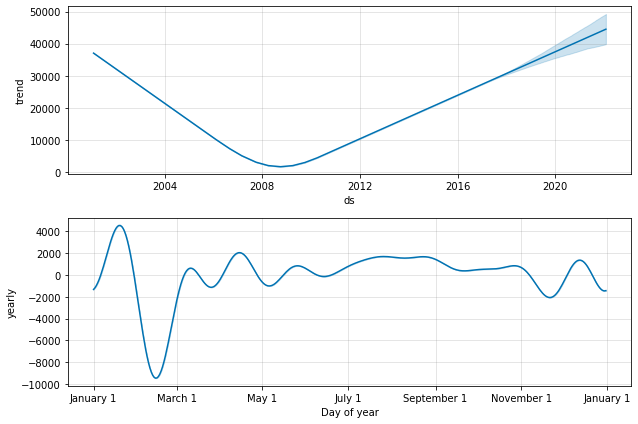

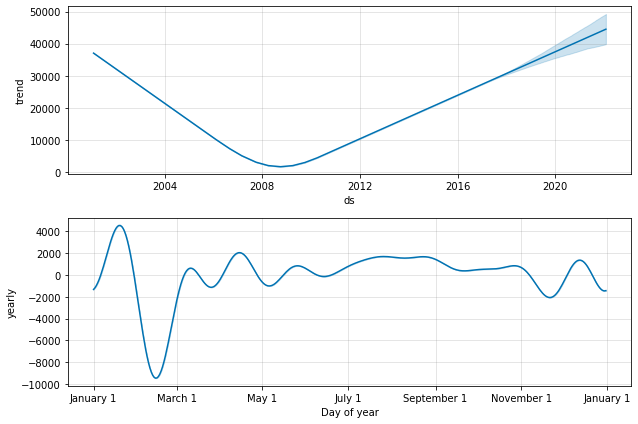

In [ ]:
m.plot_components(prediction)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

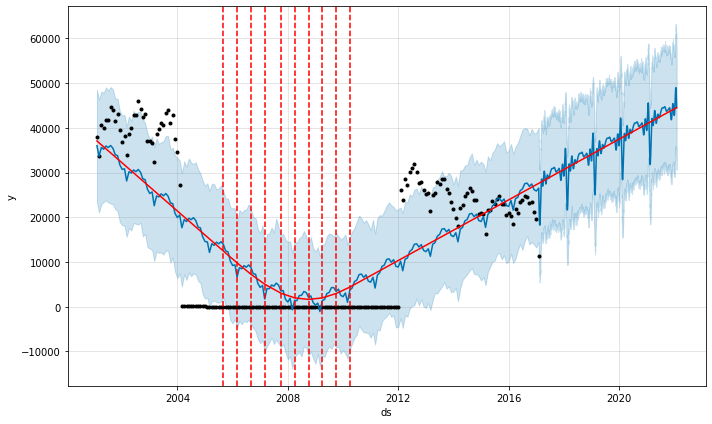

In [ ]:
fig =m.plot(prediction)
c   =add_changepoints_to_plot(fig.gca(), m, prediction)